# Hough Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1) Use Hough transform to estimate the number of sticks in the image “stick-game.png”. Choose the parameters of the transform so that the code is able to count reasonably well.

In [2]:
def hough_transform(img):
    accumulator = np.zeros(img.shape)

    img_edges = cv2.cornerHarris(img, 2, 3, 0.04)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img_edges[y, x] > 0.01:
                for theta in range(0, 180):
                    theta_rad = theta * np.pi / 180
                    r = int(x * np.cos(theta_rad) + y * np.sin(theta_rad))
                    
                    if r >= 0 and r < img.shape[0]:
                        accumulator[r, theta] += 1
                        
    best_lines = np.argwhere(accumulator > 0.5 * accumulator.max())
    lines_coords = []
    for r, theta in best_lines:
        lines_coords.append((r, theta))

    for line in lines_coords:
        r, theta = line
        theta_rad = theta * np.pi / 180
        a = np.cos(theta_rad)
        b = np.sin(theta_rad)
        x0 = a * r
        y0 = b * r
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    n_lines = len(lines_coords)

    return accumulator, img, n_lines

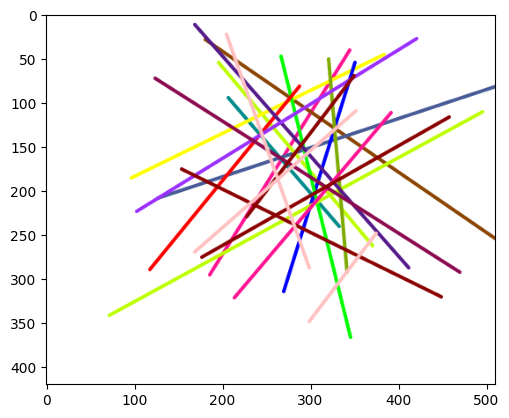

In [3]:
img = plt.imread('assets/stick-game.png')
plt.imshow(img)

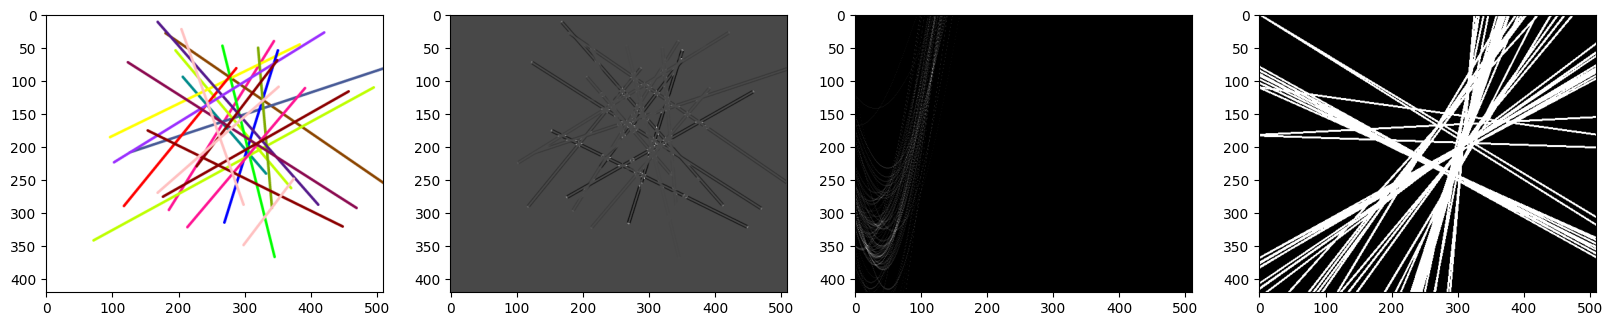

Number of lines: 56


In [4]:
img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.cornerHarris(img_bw, 2, 3, 0.04)
accumulator, img_hough, n_lines = hough_transform(img_bw)

plt.figure(figsize=(20, 50))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(edges, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(accumulator, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(img_hough, cmap='gray')

plt.show()

print(f'Number of lines: {n_lines}')


2) Use Hough transform to estimate the number of red blood cells in the image “Hemacias.jpg”. Choose the parameters of the transform so that the code is able to count reasonably well.

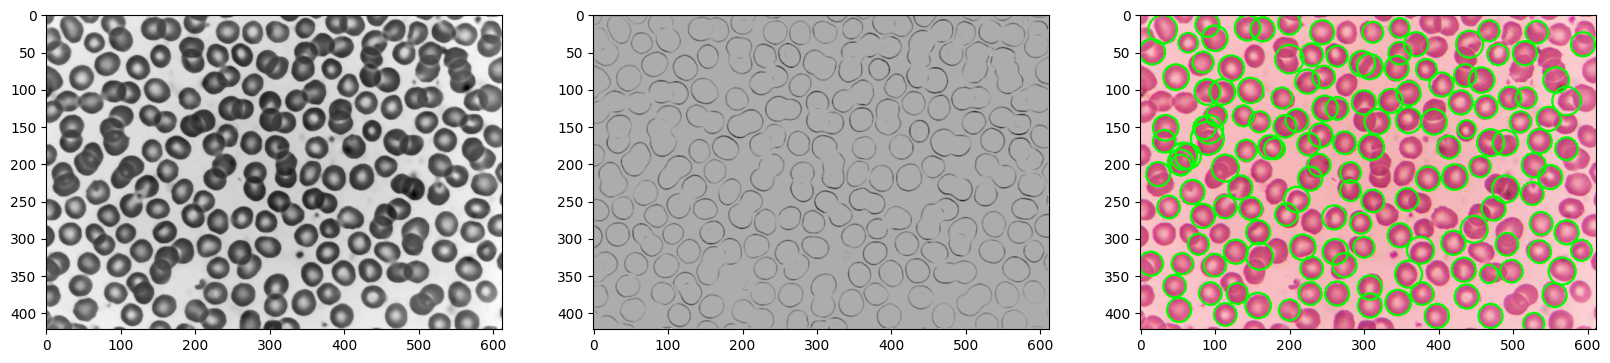

Number of circles: 151


In [5]:
img = plt.imread('assets/Hemacias.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray = cv2.medianBlur(img_gray, 5)
edges = cv2.cornerHarris(img_gray, 2, 3, 0.04)

circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 5, param1=50, param2=35, minRadius=5, maxRadius=50)

circles = np.uint16(np.around(circles))

for i in circles[0, :]:
    cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)

plt.figure(figsize=(20, 50))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(img, cmap='gray')

plt.show()

print(f'Number of circles: {len(circles[0, :])}')

3) Implement Radon transform for lines: each pixel of the image should generate a sinusoid of the image θ × r (sinogram) with intensity proportional to the intensity of the pixel. Apply this transform to the image “baldtin1000pb.png”, with resolution in the columns θ ∈ [0, π] with 100 points and resolution in the columns ρ ∈ [0,820] with 82 points.

In [6]:
def radon_transform(img):
    accumulator = np.zeros(img.shape)

    img_edges = cv2.cornerHarris(img, 2, 3, 0.04)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if img_edges[y, x] > 0.01:
                for theta in range(0, 180):
                    theta_rad = theta * np.pi / 180
                    r = int(x * np.cos(theta_rad) + y * np.sin(theta_rad))
                    
                    if r >= 0 and r < img.shape[0]:
                        accumulator[r, theta] += img[y, x] / 255
                        
    best_lines = np.argwhere(accumulator > 0.5 * accumulator.max())
    lines_coords = []
    for r, theta in best_lines:
        lines_coords.append((r, theta))

    for line in lines_coords:
        r, theta = line
        theta_rad = theta * np.pi / 180
        a = np.cos(theta_rad)
        b = np.sin(theta_rad)
        x0 = a * r
        y0 = b * r
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    n_lines = len(lines_coords)

    return accumulator, img, n_lines

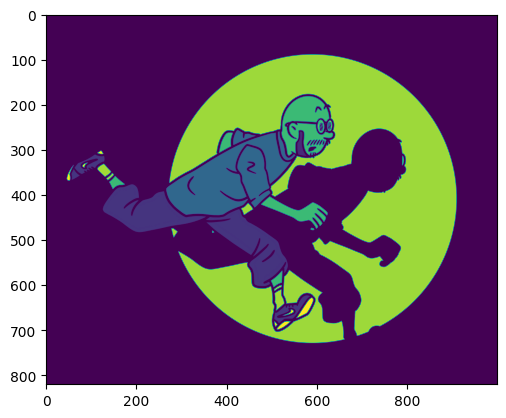

In [11]:
img = plt.imread('assets/baldtin1000pb.png')
plt.imshow(img)

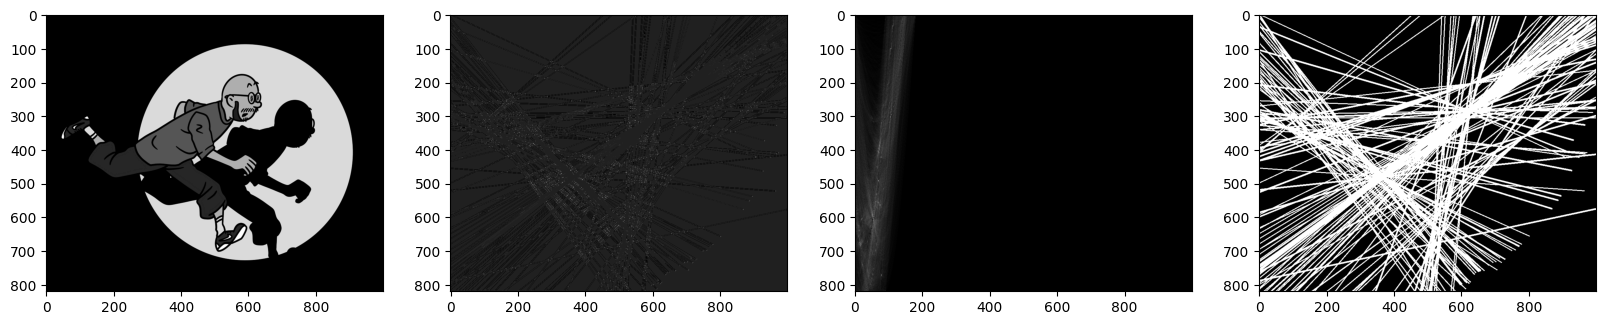

Number of lines: 72


In [13]:
img_bw = img
edges = cv2.cornerHarris(img_bw, 2, 3, 0.04)
accumulator, img_hough, n_lines = radon_transform(img_bw)
img = plt.imread('assets/baldtin1000pb.png')
plt.figure(figsize=(20, 50))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(edges, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(accumulator, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(img_hough, cmap='gray')

plt.show()

print(f'Number of lines: {n_lines}')